In [101]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt


## Exercise 1

In [102]:
df = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5]
})
df

,x,y
0,2,1
1,3,2
2,1,2
3,1,1
4,0,1
5,5,3
6,4,3
7,6,7
8,5,6
9,3,5


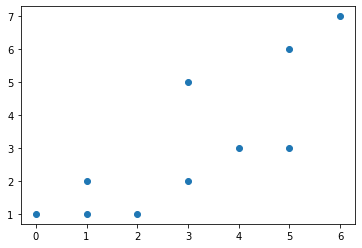

In [103]:
plt.scatter(df.x, df.y)
plt.show()

In [104]:
df['2x+1'] = df['x']*2+1
df1 = df.copy()
df1['diff'] = df.y - df['2x+1']
df1['diff_square'] = df1['diff']**2
mse = sum(df1.diff_square)/len(df1.x)
print(mse)
df1

21.1


,x,y,2x+1,diff,diff_square
0,2,1,5,-4,16
1,3,2,7,-5,25
2,1,2,3,-1,1
3,1,1,3,-2,4
4,0,1,1,0,0
5,5,3,11,-8,64
6,4,3,9,-6,36
7,6,7,13,-6,36
8,5,6,11,-5,25
9,3,5,7,-2,4


In [105]:
def mse(actual, predicted):
    mean_squared_error = ((actual - predicted)**2).sum()/len(df.x)
    return mean_squared_error

print(mse(df.y, df['2x+1']))

21.1


In [106]:
print(mse(df.y, df.x))

1.5


In [107]:
df['2x-1'] = df['x']*2-1
df
print(mse(df.y, df['2x-1']))

9.5


In [108]:
df['x-0.5'] = df['x']-0.5
df
print(mse(df.y, df['x-0.5']))

1.85


In [109]:
df['x+0.5'] = df['x']+0.5
df
print(mse(df.y, df['x+0.5']))

1.65


f(x) = x has the lowest mean squared error 

In [110]:
mses = pd.DataFrame({
    'values': [21.2, 1.5, 9.5, 1.85, 1.65]
}, index=['2x+1', 'x', '2x-1', 'x-0.5', 'x+0.5'])
mses

,values
2x+1,21.20
x,1.50
2x-1,9.50
x-0.5,1.85
x+0.5,1.65


In [111]:
df

,x,y,2x+1,2x-1,x-0.5,x+0.5
0,2,1,5,3,1.5,2.5
1,3,2,7,5,2.5,3.5
2,1,2,3,1,0.5,1.5
3,1,1,3,1,0.5,1.5
4,0,1,1,-1,-0.5,0.5
5,5,3,11,9,4.5,5.5
6,4,3,9,7,3.5,4.5
7,6,7,13,11,5.5,6.5
8,5,6,11,9,4.5,5.5
9,3,5,7,5,2.5,3.5


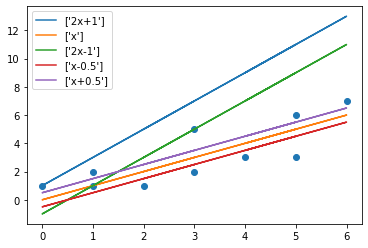

In [112]:
plt.scatter(df.x, df.y)
plt.plot(df.x, df['2x+1'], label=['2x+1'])
plt.plot(df.x, df.x, label=['x'])
plt.plot(df.x, df['2x-1'], label=['2x-1'])
plt.plot(df.x, df['x-0.5'], label=['x-0.5'])
plt.plot(df.x, df['x+0.5'], label=['x+0.5'])
plt.legend()

In [113]:
def mae(actual, predicted):
    mean_absolute_error = (abs(actual - predicted)).sum()/len(df.x)
    return mean_absolute_error
print(mae(df.y, df['2x+1']))
print(mae(df.y, df.x))
print(mae(df.y, df['2x-1']))
print(mae(df.y, df['x-0.5']))
print(mae(df.y, df['x+0.5']))

3.9
1.1
2.5
1.2
1.1


f(x) = x or f(x) = x+0.5 both have the combined lowest mean absolute errors.

In [114]:
maes = pd.DataFrame({
    'values': [3.9,1.1,2.5,1.2,1.1]
}, index=['2x+1', 'x', '2x-1', 'x-0.5', 'x+0.5'])
maes

,values
2x+1,3.9
x,1.1
2x-1,2.5
x-0.5,1.2
x+0.5,1.1


## Exercise 2

In [115]:
df2 = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5],
    'w1=0': [0*x for x in df['x']],
    'w1=1/5': [1/5*x for x in df['x']],
    'w1=1/4': [1/4*x for x in df['x']],
    'w1=1/3': [1/3*x for x in df['x']],
    'w1=1/2': [1/2*x for x in df['x']],
    'w1=1': [1*x for x in df['x']],
    'w1=2': [2*x for x in df['x']],
    'w1=3': [3*x for x in df['x']],
    'w1=4': [4*x for x in df['x']],
    'w1=5': [5*x for x in df['x']],
})
df2

,x,y,w1=0,w1=1/5,w1=1/4,w1=1/3,w1=1/2,w1=1,w1=2,w1=3,w1=4,w1=5
0,2,1,0,0.4,0.50,0.666667,1.0,2,4,6,8,10
1,3,2,0,0.6,0.75,1.000000,1.5,3,6,9,12,15
2,1,2,0,0.2,0.25,0.333333,0.5,1,2,3,4,5
3,1,1,0,0.2,0.25,0.333333,0.5,1,2,3,4,5
4,0,1,0,0.0,0.00,0.000000,0.0,0,0,0,0,0
5,5,3,0,1.0,1.25,1.666667,2.5,5,10,15,20,25
6,4,3,0,0.8,1.00,1.333333,2.0,4,8,12,16,20
7,6,7,0,1.2,1.50,2.000000,3.0,6,12,18,24,30
8,5,6,0,1.0,1.25,1.666667,2.5,5,10,15,20,25
9,3,5,0,0.6,0.75,1.000000,1.5,3,6,9,12,15


In [116]:
df2['mses'] = [mse(df.y, df2['w1=0']), mse(df.y, df2['w1=1/5']),mse(df.y, df2['w1=1/4']),mse(df.y, df2['w1=1/3']),mse(df.y, df2['w1=1/2'])
              ,mse(df.y, df2['w1=1']),mse(df.y, df2['w1=2']),mse(df.y, df2['w1=3']),mse(df.y, df2['w1=4'])
              ,mse(df.y, df2['w1=5'])]
df2

,x,y,w1=0,w1=1/5,w1=1/4,w1=1/3,w1=1/2,w1=1,w1=2,w1=3,w1=4,w1=5,mses
0,2,1,0,0.4,0.50,0.666667,1.0,2,4,6,8,10,13.900000
1,3,2,0,0.6,0.75,1.000000,1.5,3,6,9,12,15,9.404000
2,1,2,0,0.2,0.25,0.333333,0.5,1,2,3,4,5,8.437500
3,1,1,0,0.2,0.25,0.333333,0.5,1,2,3,4,5,6.966667
4,0,1,0,0.0,0.00,0.000000,0.0,0,0,0,0,0,4.550000
5,5,3,0,1.0,1.25,1.666667,2.5,5,10,15,20,25,1.500000
6,4,3,0,0.8,1.00,1.333333,2.0,4,8,12,16,20,14.300000
7,6,7,0,1.2,1.50,2.000000,3.0,6,12,18,24,30,52.300000
8,5,6,0,1.0,1.25,1.666667,2.5,5,10,15,20,25,115.500000
9,3,5,0,0.6,0.75,1.000000,1.5,3,6,9,12,15,203.900000


In [117]:
print(mse(df.y, df2['w1=0']),mse(df.y, df2['w1=1/5']),mse(df.y, df2['w1=1/4']),mse(df.y, df2['w1=1/3']),mse(df.y, df2['w1=1/2'])
     ,mse(df.y, df2['w1=1']),mse(df.y, df2['w1=2']),mse(df.y, df2['w1=3']),mse(df.y, df2['w1=4']),mse(df.y, df2['w1=5']))

13.9 9.404 8.4375 6.966666666666667 4.55 1.5 14.3 52.3 115.5 203.9


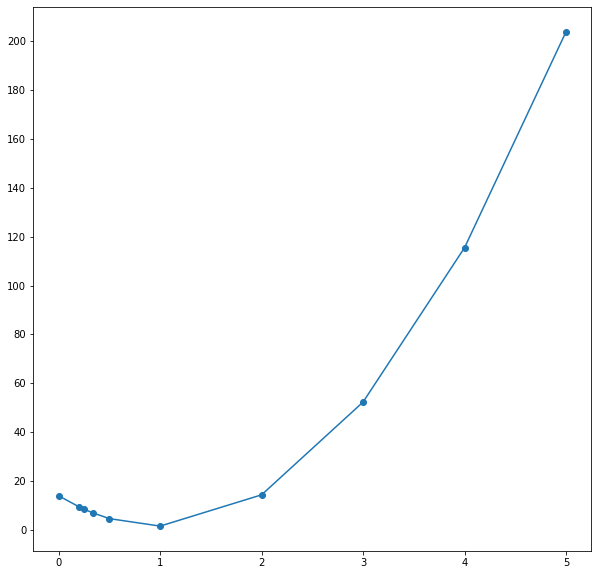

In [118]:
plt.figure(figsize = (10,10))
plt.scatter(y=[13.9, 9.404, 8.4375, 6.966666666666667, 4.55, 1.5, 14.3, 52.3, 115.5, 203.9],
           x=[0,1/5,1/4,1/3,1/2,1,2,3,4,5])
plt.plot([0,1/5,1/4,1/3,1/2,1,2,3,4,5],
        [13.9, 9.404, 8.4375, 6.966666666666667, 4.55, 1.5, 14.3, 52.3, 115.5, 203.9])
plt.yticks([0,20,40,60,80,100,120,140,160,180,200])
plt.show()

In [119]:
df3 = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5],
    'w0=-4': [1*x+-4 for x in df['x']],
    'w0=-3': [1*x+-3 for x in df['x']],
    'w0=-2': [1*x+-2 for x in df['x']],
    'w0=-1': [1*x+-1 for x in df['x']],
    'w0=0': [1*x+0 for x in df['x']],
    'w0=1': [1*x+1 for x in df['x']],
    'w0=2': [1*x+2 for x in df['x']],
    'w0=3': [1*x+3 for x in df['x']],
    'w0=4': [1*x+4 for x in df['x']],
    'w0=5': [1*x+5 for x in df['x']],
})
df3

,x,y,w0=-4,w0=-3,w0=-2,w0=-1,w0=0,w0=1,w0=2,w0=3,w0=4,w0=5
0,2,1,-2,-1,0,1,2,3,4,5,6,7
1,3,2,-1,0,1,2,3,4,5,6,7,8
2,1,2,-3,-2,-1,0,1,2,3,4,5,6
3,1,1,-3,-2,-1,0,1,2,3,4,5,6
4,0,1,-4,-3,-2,-1,0,1,2,3,4,5
5,5,3,1,2,3,4,5,6,7,8,9,10
6,4,3,0,1,2,3,4,5,6,7,8,9
7,6,7,2,3,4,5,6,7,8,9,10,11
8,5,6,1,2,3,4,5,6,7,8,9,10
9,3,5,-1,0,1,2,3,4,5,6,7,8


In [120]:
mses2 = [mse(df3.y, df3['w0=-4']),mse(df3.y, df3['w0=-3']),mse(df3.y, df3['w0=-2']),mse(df3.y, df3['w0=-1']),
         mse(df3.y, df3['w0=0']),mse(df3.y, df3['w0=1']),mse(df3.y, df3['w0=2']),mse(df3.y, df3['w0=3']),
         mse(df3.y, df3['w0=4']),mse(df3.y, df3['w0=5'])]
print(mses2)

[18.3, 11.1, 5.9, 2.7, 1.5, 2.3, 5.1, 9.9, 16.7, 25.5]


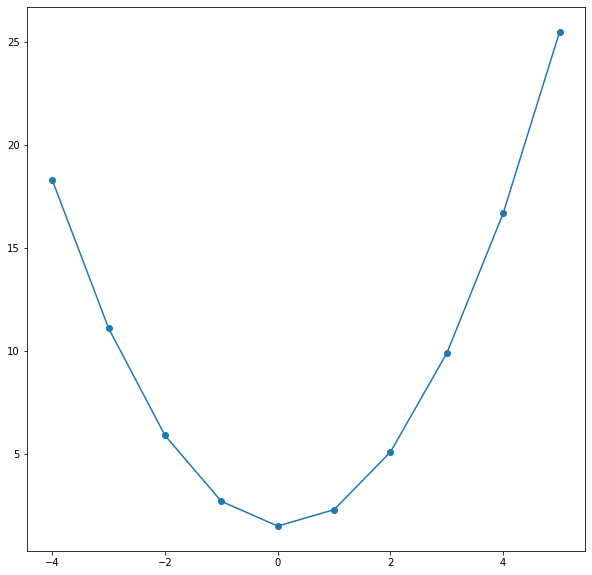

In [121]:
plt.figure(figsize = (10,10))
plt.scatter(y=mses2,
           x=[-4,-3,-2,-1,0,1,2,3,4,5])
plt.plot([-4,-3,-2,-1,0,1,2,3,4,5],
        mses2)
plt.show()

In [122]:
X = np.array([[1,1],
             [1,1],
             [1,1],
             [1,1],
             [1,1],
             [1,2]])
Xt = X.transpose()
print(Xt)

y = np.array([[1.0],
              [0.8],
              [1.2],
              [1.1],
              [0.7],
              [2.0]])


[[1 1 1 1 1 1]
 [1 1 1 1 1 2]]


In [123]:
print(Xt@X)

[[6 7]
 [7 9]]


In [124]:
print(np.linalg.inv(Xt@X))

[[ 1.8 -1.4]
 [-1.4  1.2]]


In [125]:
print(Xt@y)

[[6.8]
 [8.8]]


In [126]:
Xt_1 = np.linalg.inv(Xt@X)
Xt_1

array([[ 1.8, -1.4],
       [-1.4,  1.2]])

In [127]:
print(Xt_1)
print(y)
print(Xt_1@Xt)
print((Xt_1@Xt)@y)
w = (Xt_1@Xt)@y
print(w.transpose())

[[ 1.8 -1.4]
 [-1.4  1.2]]
[[1. ]
 [0.8]
 [1.2]
 [1.1]
 [0.7]
 [2. ]]
[[ 0.4  0.4  0.4  0.4  0.4 -1. ]
 [-0.2 -0.2 -0.2 -0.2 -0.2  1. ]]
[[-0.08]
 [ 1.04]]
[[-0.08  1.04]]


In [128]:
df_polynomial = pd.DataFrame({
    'x': [1,2,3,5,7,8,2.5,8],
    'y': [2.2,3.5,3.9,2.9,5,6.2,3,4.8]
})
df_polynomial['x_squared'] = df_polynomial.x**2
df_polynomial['x_cubed'] = df_polynomial.x**3
df_polynomial

,x,y,x_squared,x_cubed
0,1.0,2.2,1.00,1.000
1,2.0,3.5,4.00,8.000
2,3.0,3.9,9.00,27.000
3,5.0,2.9,25.00,125.000
4,7.0,5.0,49.00,343.000
5,8.0,6.2,64.00,512.000
6,2.5,3.0,6.25,15.625
7,8.0,4.8,64.00,512.000


In [129]:
X_squared_matrix = np.array([[1, 1, 1],
                            [1,2,4],
                            [1,3,9],
                            [1,5,25],
                           [1,7,49],
                             [1,8,64],
                             [1,2.5,6.25],
                             [1,8,64]])
y = np.array([[2.2],
             [3.5],
             [3.9],
             [2.9],
            [5.0],
             [6.2],
             [3.0],
             [4.8]])

X_squared_T = X_squared_matrix.transpose()
X_squared_T_inv = np.linalg.inv(X_squared_T@X_squared_matrix)
print((X_squared_T_inv@X_squared_T)@y)
ws_squared = ((X_squared_T_inv@X_squared_T)@y).transpose()
ws_squared

[[2.7167995 ]
 [0.03485877]
 [0.03821489]]


array([[2.7167995 , 0.03485877, 0.03821489]])

In [130]:
X_cubed_matrix = np.array([[1, 1, 1, 1],
                            [1,2,4,8],
                            [1,3,9,27],
                            [1,5,25,125],
                           [1,7,49,343],
                             [1,8,64,512],
                             [1,2.5,6.25,15.625],
                             [1,8,64,512]])

X_cubed_T = X_cubed_matrix.transpose()
X_cubed_T_inv = np.linalg.inv(X_cubed_T@X_cubed_matrix)
ws_cubed = ((X_cubed_T_inv@X_cubed_T)@y).transpose()


In [131]:
df_polynomial

df_polynomial['y_pred_quadratic'] = ws_squared[0][0] + ws_squared[0][1]*df_polynomial['x'] + ws_squared[0][2]*df_polynomial['x']**2
df_polynomial['y_pred_cubatic'] = ws_cubed[0][0] + ws_cubed[0][1]*df_polynomial['x'] + ws_cubed[0][2]*df_polynomial['x']**2 + ws_cubed[0][3]*df_polynomial['x']**3
#print(ws_squared[0][1])
df_polynomial

,x,y,x_squared,x_cubed,y_pred_quadratic,y_pred_cubatic
0,1.0,2.2,1.00,1.000,2.789873,2.359000
1,2.0,3.5,4.00,8.000,2.939377,3.154886
2,3.0,3.9,9.00,27.000,3.165310,3.460244
3,5.0,2.9,25.00,125.000,3.846466,3.515858
4,7.0,5.0,49.00,343.000,4.833340,4.358803
5,8.0,6.2,64.00,512.000,5.441422,5.648324
6,2.5,3.0,6.25,15.625,3.042789,3.354561
7,8.0,4.8,64.00,512.000,5.441422,5.648324


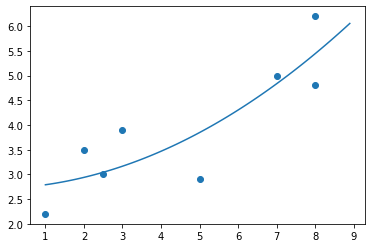

In [132]:
x = np.arange(1,9,0.1)
y = [ws_squared[0][0] + ws_squared[0][1]*x + ws_squared[0][2]*x**2 for x in x]
plt.scatter(df_polynomial['x'], df_polynomial['y'])
plt.plot(x,y)
plt.show()

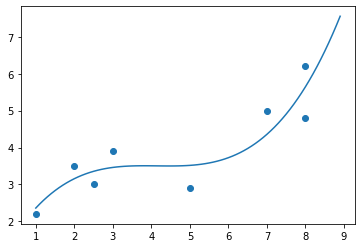

In [133]:
x = np.arange(1,9,0.1)
y = [ws_cubed[0][0] + ws_cubed[0][1]*x + ws_cubed[0][2]*x**2 + ws_cubed[0][3]*x**3 for x in x]
plt.scatter(df_polynomial['x'], df_polynomial['y'])
plt.plot(x,y)
plt.show()

In [134]:
print(mse(df_polynomial['y'], df_polynomial.y_pred_quadratic))

0.3114284682163788


In [135]:
print(mse(df_polynomial['y'], df_polynomial.y_pred_cubatic))

0.22778987825490934


In [136]:
lst = [df_polynomial.x**i for i in range(1,9)]
lst

[0    1.0
 1    2.0
 2    3.0
 3    5.0
 4    7.0
 5    8.0
 6    2.5
 7    8.0
 Name: x, dtype: float64,
 0     1.00
 1     4.00
 2     9.00
 3    25.00
 4    49.00
 5    64.00
 6     6.25
 7    64.00
 Name: x, dtype: float64,
 0      1.000
 1      8.000
 2     27.000
 3    125.000
 4    343.000
 5    512.000
 6     15.625
 7    512.000
 Name: x, dtype: float64,
 0       1.0000
 1      16.0000
 2      81.0000
 3     625.0000
 4    2401.0000
 5    4096.0000
 6      39.0625
 7    4096.0000
 Name: x, dtype: float64,
 0        1.00000
 1       32.00000
 2      243.00000
 3     3125.00000
 4    16807.00000
 5    32768.00000
 6       97.65625
 7    32768.00000
 Name: x, dtype: float64,
 0         1.000000
 1        64.000000
 2       729.000000
 3     15625.000000
 4    117649.000000
 5    262144.000000
 6       244.140625
 7    262144.000000
 Name: x, dtype: float64,
 0    1.000000e+00
 1    1.280000e+02
 2    2.187000e+03
 3    7.812500e+04
 4    8.235430e+05
 5    2.097152e+06
 6    6.10

In [137]:
df_polynomial = df_polynomial.assign(four=lst[3],five=lst[4],six=lst[5],seven=lst[6],eight=lst[7])
df_polynomial

,x,y,x_squared,x_cubed,y_pred_quadratic,y_pred_cubatic,four,five,six,seven,eight
0,1.0,2.2,1.00,1.000,2.789873,2.359000,1.0000,1.00000,1.000000,1.000000e+00,1.000000e+00
1,2.0,3.5,4.00,8.000,2.939377,3.154886,16.0000,32.00000,64.000000,1.280000e+02,2.560000e+02
2,3.0,3.9,9.00,27.000,3.165310,3.460244,81.0000,243.00000,729.000000,2.187000e+03,6.561000e+03
3,5.0,2.9,25.00,125.000,3.846466,3.515858,625.0000,3125.00000,15625.000000,7.812500e+04,3.906250e+05
4,7.0,5.0,49.00,343.000,4.833340,4.358803,2401.0000,16807.00000,117649.000000,8.235430e+05,5.764801e+06
5,8.0,6.2,64.00,512.000,5.441422,5.648324,4096.0000,32768.00000,262144.000000,2.097152e+06,1.677722e+07
6,2.5,3.0,6.25,15.625,3.042789,3.354561,39.0625,97.65625,244.140625,6.103516e+02,1.525879e+03
7,8.0,4.8,64.00,512.000,5.441422,5.648324,4096.0000,32768.00000,262144.000000,2.097152e+06,1.677722e+07


In [138]:
X_eight_matrix = np.array([[1,1,1,1,1,1,1,1],df_polynomial.x,df_polynomial.x_squared, df_polynomial.x_cubed,df_polynomial.four,
                 df_polynomial.five,df_polynomial.six,df_polynomial.seven,df_polynomial.eight])
y = np.array([[2.2],
             [3.5],
             [3.9],
             [2.9],
            [5.0],
             [6.2],
             [3.0],
             [4.8]])
X_eight_matrix = X_eight_matrix.T
X_eight_matrix

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02,
        2.56000000e+02],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02, 2.18700000e+03,
        6.56100000e+03],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04, 7.81250000e+04,
        3.90625000e+05],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03, 1.68070000e+04, 1.17649000e+05, 8.23543000e+05,
        5.76480100e+06],
       [1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03, 3.27680000e+04, 2.62144000e+05, 2.09715200e+06,
        1.6

In [139]:
X_eight_T = X_eight_matrix.transpose()
X_eight_T_inv = np.linalg.inv(X_eight_T@X_eight_matrix)
ws_eight = ((X_eight_T_inv@X_eight_T)@y).transpose()
ws_eight

array([[-7.45899486e+00,  7.92685752e+01, -6.10239269e+01,
         1.81770526e+01, -1.55191624e+00, -2.21206289e-01,
         3.62879823e-02,  5.37167077e-04, -1.81759707e-04]])

In [140]:
print(ws_eight[0][0])

-7.458994862611945


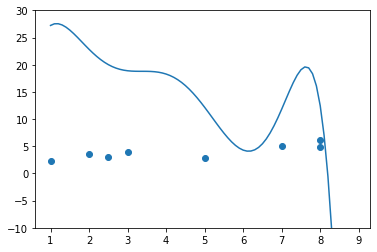

In [141]:
fig, ax = plt.subplots(1,1)
x = np.arange(1,9,0.1)
y = [ws_eight[0][0] + ws_eight[0][1]*x + ws_eight[0][2]*x**2 + ws_eight[0][3]*x**3 + ws_eight[0][4]*x**4
      + ws_eight[0][5]*x**5 + ws_eight[0][6]*x**6 + ws_eight[0][7]*x**7 + ws_eight[0][8]*x**8 for x in x]
     
plt.scatter(df_polynomial['x'], df_polynomial['y'])
plt.plot(x,y)
ax.set_ylim(-10,30)
plt.show()

In [142]:
animals = pd.read_csv('AnimalsHRvsBM.csv')

In [143]:
animals.head()

,Animal,BM (g),HR (bpm)
0,Wild mouse,22,480
1,White rat,237,347
2,White mouse,29,376
3,Talapoin,100,233
4,Syrian bear,250000,70


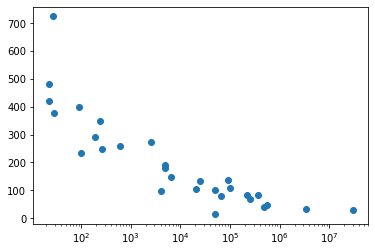

In [144]:
fig, ax = plt.subplots(1,1)
plt.scatter(animals['BM (g)'], animals['HR (bpm)'])
ax.set_xscale('log')
#ax.set_yscale('log')

In [145]:
animals['log10'] = np.log10(animals['BM (g)'])
animals

,Animal,BM (g),HR (bpm),log10
0,Wild mouse,22,480,1.342423
1,White rat,237,347,2.374748
2,White mouse,29,376,1.462398
3,Talapoin,100,233,2.000000
4,Syrian bear,250000,70,5.397940
5,Spermophilus,189,290,2.276462
6,Meerkat,5000,190,3.698970
7,Siberian tiger,220000,82,5.342423
8,Sheep,51000,103,4.707570
9,Roe deer,20700,104,4.315970


In [190]:
quadratic = animals['log10']**2
quadratic = np.array(quadratic)
quadratic
normal = np.array(animals['BM (g)'])
normal = normal.reshape(-1,1)
n = normal[0]
n = np.insert(n, 0, 1)
n
normal

array([[      22],
       [     237],
       [      29],
       [     100],
       [  250000],
       [     189],
       [    5000],
       [  220000],
       [   51000],
       [   20700],
       [     260],
       [    2500],
       [  375000],
       [      22],
       [  100000],
       [      27],
       [    6600],
       [30000000],
       [   66000],
       [  494000],
       [      90],
       [     593],
       [   91600],
       [ 3437000],
       [   25000],
       [    5000],
       [   50600],
       [    4000],
       [  545000]])

In [260]:
def square(element):
    return element**2

def cube(element):
    return element**3

def original(element):
    return element

def ones(element):
    return element/element

def fours(element):
    return element**4

square_lst = [ones, original, square, cube]

test_data = [2,3,4,5,6]
new_lst = []
for x in test_data:
    for y in square_lst:
        print(y(x))
        new_lst.append(y(x))
new_lst

new_lst2 = np.array(new_lst)
new_lst2.reshape(5,4)

1.0
2
4
8
1.0
3
9
27
1.0
4
16
64
1.0
5
25
125
1.0
6
36
216


array([[  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.]])

In [265]:
len(list(animals['BM (g)']))

29

In [272]:
new_lst = []
for x in list(animals['log10']):
    for y in square_lst:
        #print(y(x))
        new_lst.append(y(x))
new_lst

new_lst2 = np.array(new_lst)
new_lst2.reshape(len(list(animals['log10'])),4)

array([[  1.        ,   1.34242268,   1.80209865,   2.41917811],
       [  1.        ,   2.37474835,   5.63942971,  13.39222637],
       [  1.        ,   1.462398  ,   2.1386079 ,   3.12749592],
       [  1.        ,   2.        ,   4.        ,   8.        ],
       [  1.        ,   5.39794001,  29.13775634, 157.2838607 ],
       [  1.        ,   2.2764618 ,   5.18227835,  11.79725871],
       [  1.        ,   3.69897   ,  13.68237909,  50.61070985],
       [  1.        ,   5.34242268,  28.5414801 , 152.48065063],
       [  1.        ,   4.70757018,  22.16121696, 104.32548404],
       [  1.        ,   4.31597035,  18.62760002,  80.39616931],
       [  1.        ,   2.41497335,   5.83209627,  14.08435706],
       [  1.        ,   3.39794001,  11.5459963 ,  39.23260278],
       [  1.        ,   5.57403127,  31.06982457, 173.18417366],
       [  1.        ,   1.34242268,   1.80209865,   2.41917811],
       [  1.        ,   5.        ,  25.        , 125.        ],
       [  1.        ,   1